In [2]:
import numpy as np
np.random.seed(1337)  # for reproducibility

import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import pickle
import os
import pandas as pd
import seaborn as sb

import utils as pic
    
%load_ext autoreload
%autoreload 2

In [3]:
scandir = 'scans/cnn3d-v2-1.00e-01-9.90e-03-32x32'
scancsv = list(filter(lambda f:f.endswith('.csv'),os.listdir(scandir)))
scancsv

['112721184330.csv', '112821082211.csv']

In [4]:
dflist = [ pd.read_csv(f"{scandir}/{csv}") for csv in scancsv ]
scandf = pd.concat(dflist,axis=0,ignore_index=True)


In [7]:
scandf.sort_values('val_accuracy')[::-1].T

,11,21,6,3,34,15,1,10,4,16,...,12,37,17,22,23,25,27,18,14,13
round_epochs,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
loss,0.560289,0.588785,0.58715,0.579367,0.583268,0.582312,0.602887,0.572092,0.576169,0.609248,...,0.647619,0.586688,0.616506,0.635492,0.615054,0.609835,0.59499,0.592698,0.601239,0.633309
accuracy,0.72245,0.70195,0.698,0.70415,0.7056,0.70305,0.68245,0.71005,0.7056,0.6757,...,0.62145,0.7032,0.6651,0.64025,0.671,0.6791,0.69335,0.692,0.6857,0.641
val_loss,0.637605,0.657715,0.636845,0.646477,0.676485,0.646172,0.71861,0.655019,0.672887,0.66039,...,1.557871,1.207941,3.248877,0.815173,0.856141,1.516671,0.879662,0.900512,0.7185,2.994103
val_accuracy,0.6916,0.669,0.6541,0.65305,0.6493,0.6397,0.63395,0.63375,0.62225,0.61755,...,0.5001,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.4941,0.44855
lr,0.000001,0.000001,0.000002,0.000002,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
activation,elu,elu,relu,elu,relu,elu,relu,elu,elu,elu,...,relu,relu,elu,relu,relu,relu,relu,relu,elu,elu
batchsize,50,150,150,100,150,50,100,100,50,100,...,150,150,100,100,150,150,100,150,150,50
dropout,0.2,0.4,0.4,0.4,0.4,0.4,0.6,0.4,0.4,0.2,...,0.4,0.4,0.2,0.6,0.6,0.4,0.6,0.4,0.6,0.2
nfilters_1,64,64,32,64,96,64,64,32,96,32,...,32,96,96,64,64,96,96,32,64,32


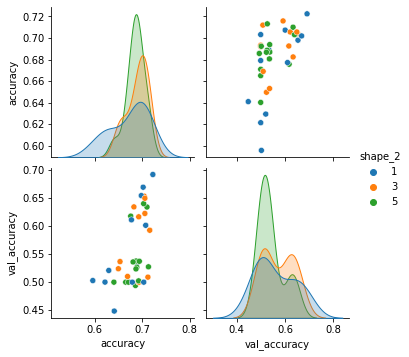

In [6]:
sb.pairplot(scandf,vars=['accuracy','val_accuracy'],palette='tab10',hue='shape_2')